In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


# Reading the CSV file

In [2]:
df = pd.read_csv("E:\\IIT Kanpur\\Placements\\Projects\\SBI Stock price prediction\\SBIN.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,7/17/2015,272.399994,274.000000,270.500000,271.100006,265.187134,5571891
1,7/20/2015,272.000000,272.000000,266.149994,267.450012,261.616760,6418930
2,7/21/2015,267.000000,269.799988,263.500000,264.299988,258.535431,5638653
3,7/22/2015,263.700012,269.399994,261.899994,268.549988,262.692749,11322177
4,7/23/2015,268.500000,272.000000,267.250000,270.049988,264.160034,6376216


In [3]:
print(df.head())
print(df.shape)
print(df.columns)

        Date        Open        High         Low       Close   Adj Close  \
0  7/17/2015  272.399994  274.000000  270.500000  271.100006  265.187134   
1  7/20/2015  272.000000  272.000000  266.149994  267.450012  261.616760   
2  7/21/2015  267.000000  269.799988  263.500000  264.299988  258.535431   
3  7/22/2015  263.700012  269.399994  261.899994  268.549988  262.692749   
4  7/23/2015  268.500000  272.000000  267.250000  270.049988  264.160034   

     Volume  
0   5571891  
1   6418930  
2   5638653  
3  11322177  
4   6376216  
(1228, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


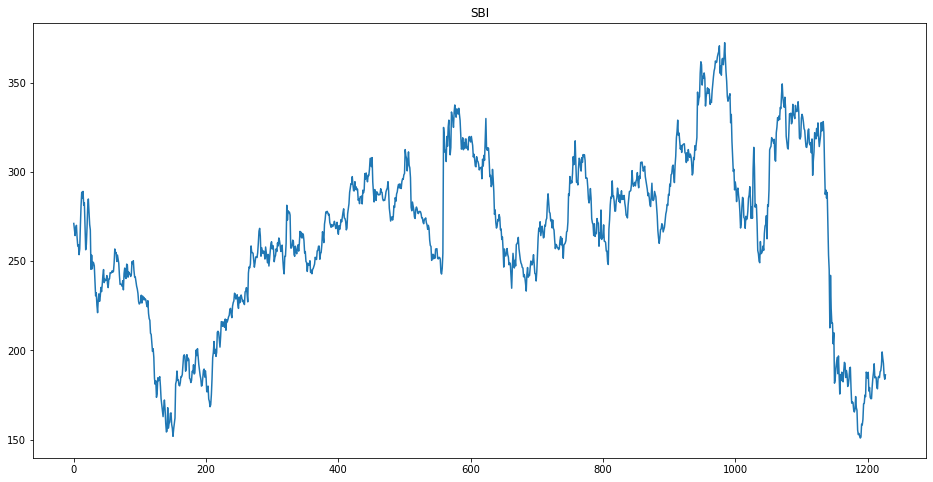

In [4]:
plt.figure(figsize=(16,8)) 
df['Close'].plot()
plt.title("SBI")
plt.show()

Text(0.5, 1.0, 'SBI Autocorrelation plot')

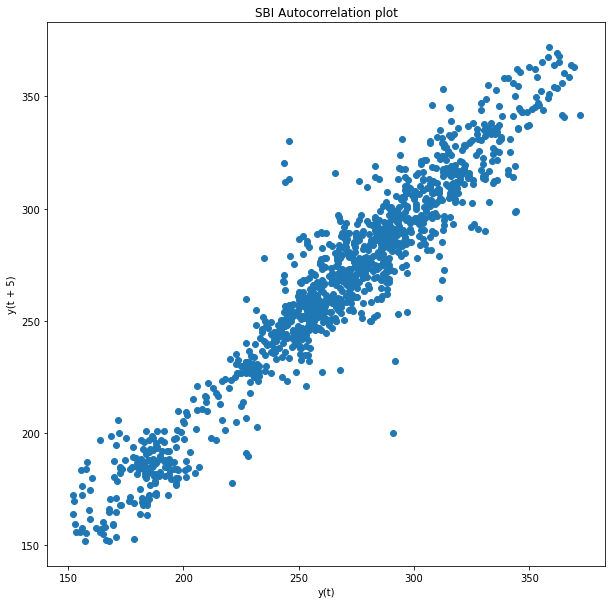

In [5]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('SBI Autocorrelation plot')

# ARIMA for Time series Prediction

In [6]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

In [7]:
train_data.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
980,7/11/2019,358.5,364.000000,357.0,363.200012,363.200012,20048321
981,7/12/2019,363.0,366.549988,361.5,363.600006,363.600006,14661748


In [8]:
test_data.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
1226,7/15/2020,187.949997,189.949997,183.000000,183.800003,183.800003,58527305
1227,7/16/2020,185.000000,186.949997,181.649994,186.250000,186.250000,46546803


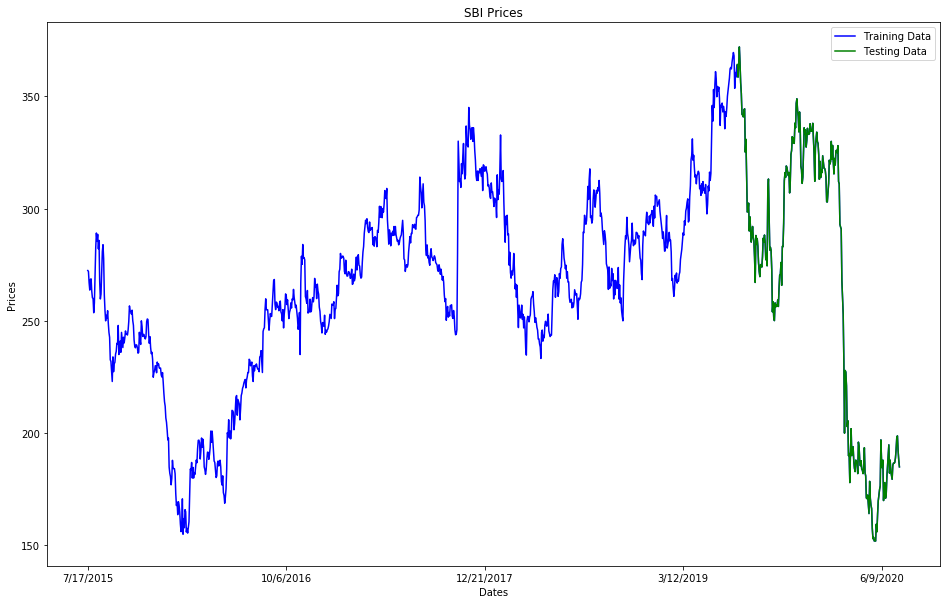

In [9]:
plt.figure(figsize=(16,10))
plt.title('SBI Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0, 1228, 300), df['Date'][0:1228:300])
plt.legend()

In [10]:
def smape_kun(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true) * 200 / (np.abs(y_pred) + np.abs(y_true)))

In [11]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

In [12]:
history = [x for x in train_ar]
print(type(history))

<class 'list'>


## This is adding predicting for one day, based on the past days.

In [14]:
predictions = list()

for t in range(len(test_ar)):
    print(t)
    model = ARIMA(history, order = (5,1,0)) # (p,d,q) here q is zero meaning the model is autoregressive (AR model)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()   # outputs a tuple, with first as forecast, second as std. error 
                                    # third as conf_int default is 95 %
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    print(len(history))
    #print('predicted=%f, expected=%f' % (yhat, obs))

0
983
1
984
2
985
3
986
4
987
5
988
6
989
7
990
8
991
9
992
10
993
11
994
12
995
13
996
14
997
15
998
16
999
17
1000
18
1001
19
1002
20
1003
21
1004
22
1005
23
1006
24
1007
25
1008
26
1009
27
1010
28
1011
29
1012
30
1013
31
1014
32
1015
33
1016
34
1017
35
1018
36
1019
37
1020
38
1021
39
1022
40
1023
41
1024
42
1025
43
1026
44
1027
45
1028
46
1029
47
1030
48
1031
49
1032
50
1033
51
1034
52
1035
53
1036
54
1037
55
1038
56
1039
57
1040
58
1041
59
1042
60
1043
61
1044
62
1045
63
1046
64
1047
65
1048
66
1049
67
1050
68
1051
69
1052
70
1053
71
1054
72
1055
73
1056
74
1057
75
1058
76
1059
77
1060
78
1061
79
1062
80
1063
81
1064
82
1065
83
1066
84
1067
85
1068
86
1069
87
1070
88
1071
89
1072
90
1073
91
1074
92
1075
93
1076
94
1077
95
1078
96
1079
97
1080
98
1081
99
1082
100
1083
101
1084
102
1085
103
1086
104
1087
105
1088
106
1089
107
1090
108
1091
109
1092
110
1093
111
1094
112
1095
113
1096
114
1097
115
1098
116
1099
117
1100
118
1101
119
1102
120
1103
121
1104
122
1105
123
1106
124
1107
12

In [15]:
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 67.085


In [16]:
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

Symmetric mean absolute percentage error: 28.501


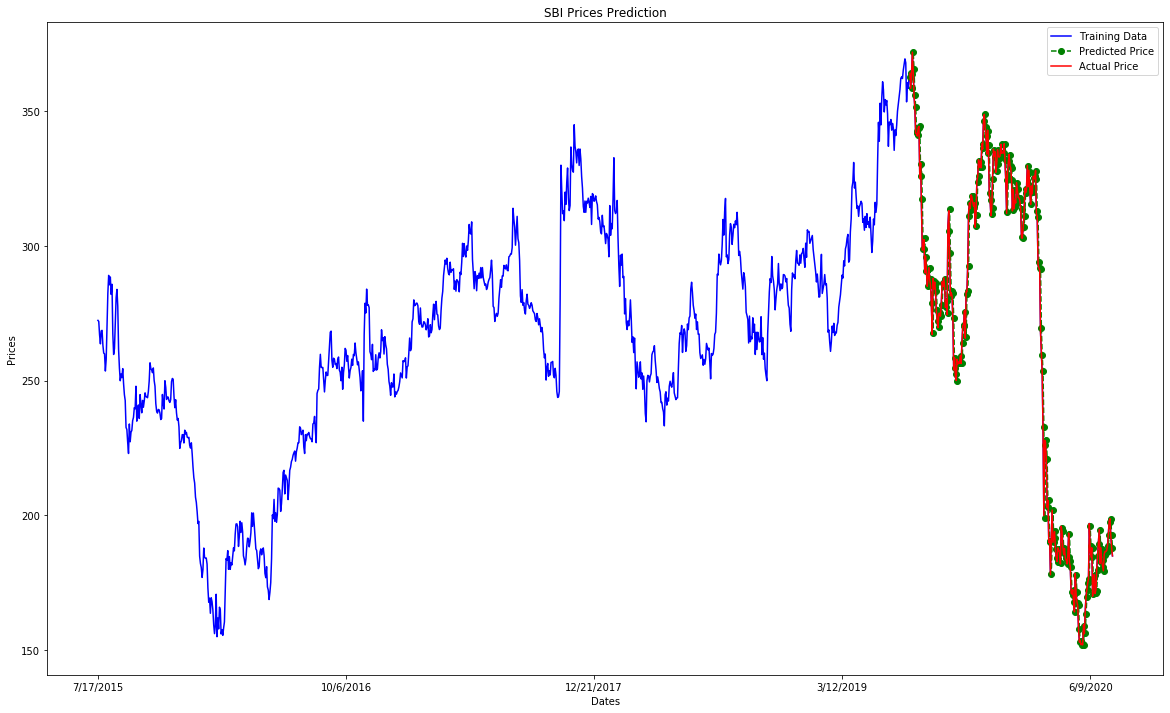

In [17]:
plt.figure(figsize = (20,12))

plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('SBI Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1227, 300), df['Date'][0:1227:300])
plt.legend()

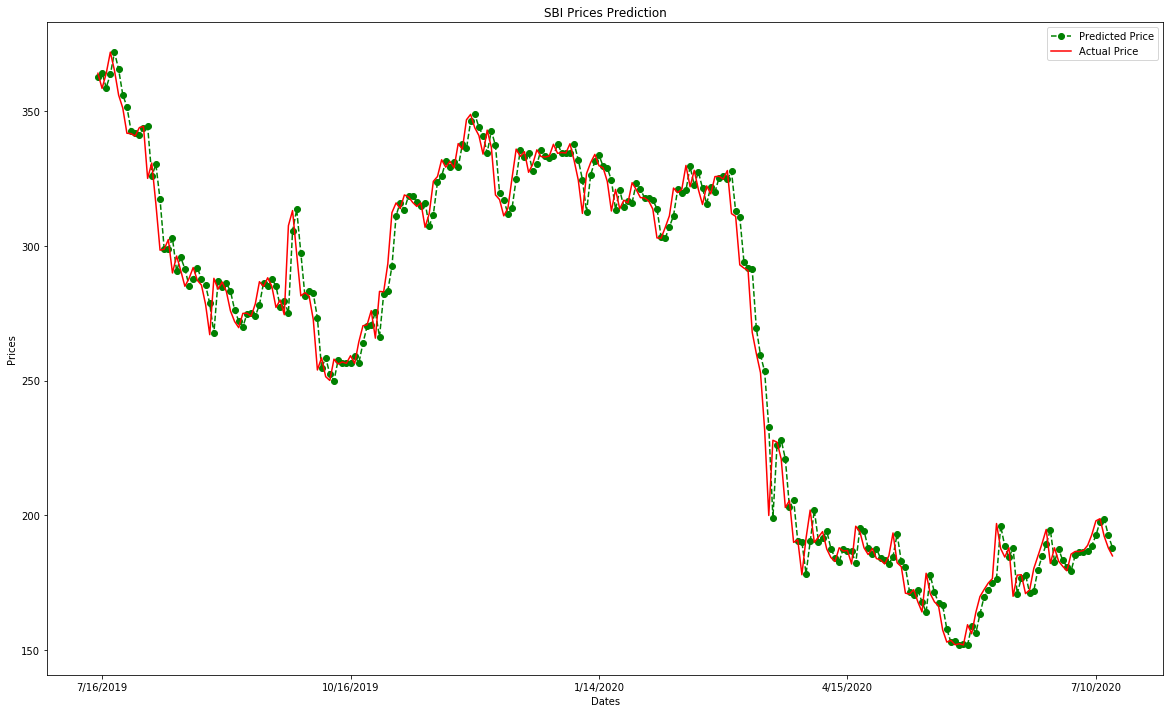

In [18]:
plt.figure(figsize=(20,12))

plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(983,1227, 60), df['Date'][983:1227:60])
plt.title('SBI Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

## For predicting for the entire test data based on the train data

In [19]:
history = [x for x in train_ar]
print(type(history))

<class 'list'>


In [20]:
predictions = list()

for t in range(len(test_ar)):
    print(t)
    model = ARIMA(history, order=(5,1,0)) # (p,d,q) here q is zero meaning the model is autoregressive (AR model)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()   # outputs a tuple, with first as forecast, second as std. error 
                                    # third as conf_int default is 95 %
    yhat = output[0]
    predictions.append(yhat)
    obs = yhat
    history.append(obs)
    print(len(history))
    #print('predicted=%f, expected=%f' % (yhat, obs))

0
983
1
984
2
985
3
986
4
987
5
988
6
989
7
990
8
991
9
992
10
993
11
994
12
995
13
996
14
997
15
998
16
999
17
1000
18
1001
19
1002
20
1003
21
1004
22
1005
23
1006
24
1007
25
1008
26
1009
27
1010
28
1011
29
1012
30
1013
31
1014
32
1015
33
1016
34
1017
35
1018
36
1019
37
1020
38
1021
39
1022
40
1023
41
1024
42
1025
43
1026
44
1027
45
1028
46
1029
47
1030
48
1031
49
1032
50
1033
51
1034
52
1035
53
1036
54
1037
55
1038
56
1039
57
1040
58
1041
59
1042
60
1043
61
1044
62
1045
63
1046
64
1047
65
1048
66
1049
67
1050
68
1051
69
1052
70
1053
71
1054
72
1055
73
1056
74
1057
75
1058
76
1059
77
1060
78
1061
79
1062
80
1063
81
1064
82
1065
83
1066
84
1067
85
1068
86
1069
87
1070
88
1071
89
1072
90
1073
91
1074
92
1075
93
1076
94
1077
95
1078
96
1079
97
1080
98
1081
99
1082
100
1083
101
1084
102
1085
103
1086
104
1087
105
1088
106
1089
107
1090
108
1091
109
1092
110
1093
111
1094
112
1095
113
1096
114
1097
115
1098
116
1099
117
1100
118
1101
119
1102
120
1103
121
1104
122
1105
123
1106
124
1107
12

In [21]:
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)

Testing Mean Squared Error: 16575.806


In [22]:
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

Symmetric mean absolute percentage error: 36.399


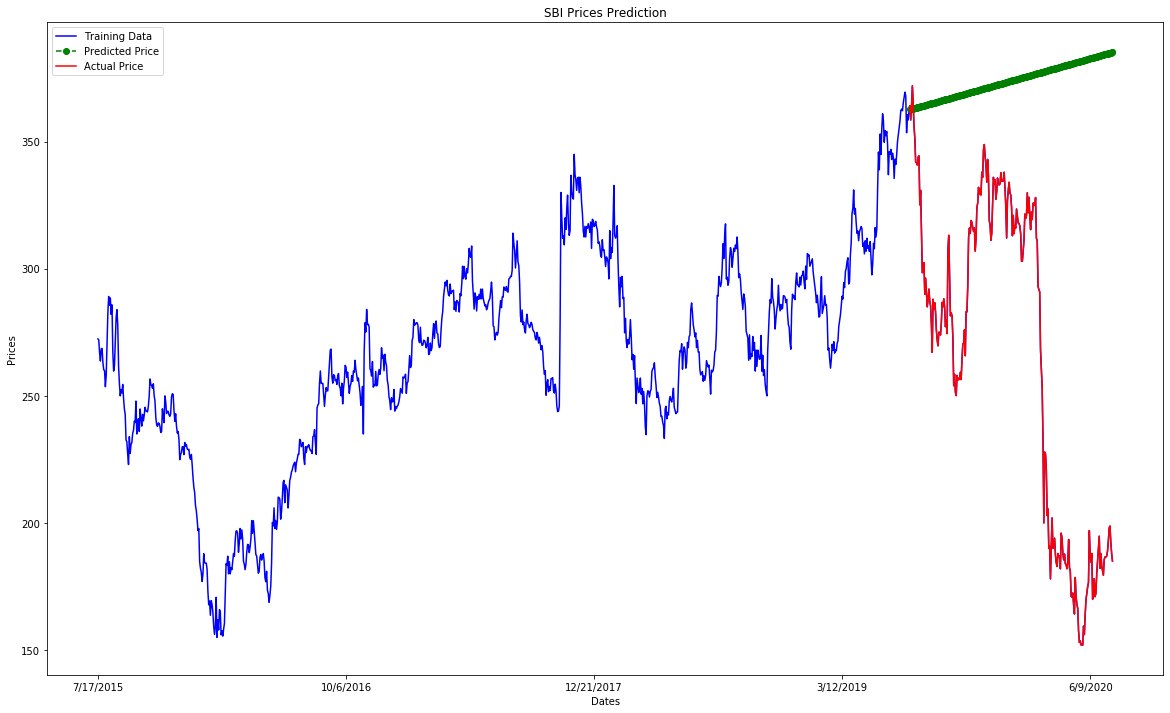

In [23]:
plt.figure(figsize=(20,12))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('SBI Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1227, 300), df['Date'][0:1227:300])
plt.legend()

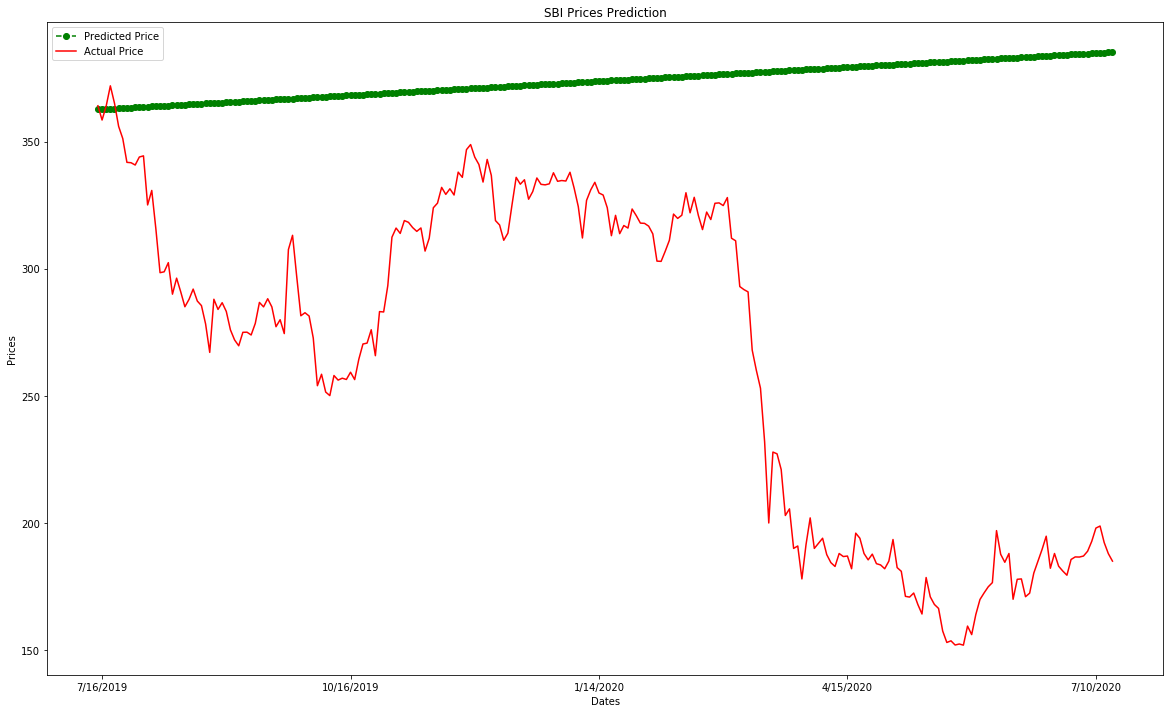

In [24]:
plt.figure(figsize=(20,12))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(983,1227, 60), df['Date'][983:1227:60])
plt.title('SBI Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()